In [1]:
import numpy as np
from mcfacts.inputs.settings_manager import AGNDisk, SettingsManager
from mcfacts.modules import accretion

import astropy.units as u

settings = SettingsManager({
    "verbose": False,
    "override_files": True,
    "save_state": True,
    "save_each_timestep": True
})

agn_disk = AGNDisk(settings)

### Sirko & Goodman 2003 parameters ###
Mbh = 1.000000e+08 MSun
Mdot = 2.596689e+00 MSun/yr
le = 1.0
Rs = 9.570121e-06 pc
Rmin = 2.500000e+00 Rs
Rmax = 1.000000e+07 Rs, 9.570121e+01 pc
alpha = 0.01
b = 0
eps = 0.1
X = 0.7
Opacity = combined

debug = False
xtol = 1e-10
root method = lm
Q<1 at i=3502 (R=9.06e+02 Rs)
Beginning star formation at index 3502
Mdisk = 422372550.2716628 Msun
Mdisk/Mbh = 4.223725502716627


In [27]:
disk_bh_pro_masses = np.asarray([10])
disk_bh_pro_orb_a = np.asarray([20000])
disk_bh_pro_spins = np.asarray([0])
disk_bh_pro_spin_angle = np.asarray([0])
disk_sound_speed = agn_disk.disk_sound_speed
disk_density = agn_disk.disk_density
disk_aspect_ratio = agn_disk.disk_aspect_ratio
migration_velocity = np.asarray([0])
disk_bh_torque_condition = 0.1
smbh_mass = 1e8
timestep_duration_yr = 0.01

In [28]:
for i in range(10000):
	m, s, p = accretion.prograde_bh_accretion_bondi(
		np.asarray(disk_bh_pro_masses[-1]),
		disk_bh_pro_orb_a,
		np.asarray(disk_bh_pro_spins[-1]), 
		np.asarray(disk_bh_pro_spin_angle[-1]), 
		disk_sound_speed, 
		disk_density, 
		disk_aspect_ratio, 
		migration_velocity, 
		disk_bh_torque_condition, 
		smbh_mass, 
		timestep_duration_yr
	)
	
	disk_bh_pro_masses = np.append(disk_bh_pro_masses, m)
	disk_bh_pro_spins = np.append(disk_bh_pro_spins, s)
	disk_bh_pro_spin_angle = np.append(disk_bh_pro_spin_angle, p)

<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\c'
/var/folders/ll/v1xt8w0j7bn55wn96smz2wtc0000gn/T/ipykernel_14142/94880672.py:4: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("Mass ($M_\odot$)")
/var/folders/ll/v1xt8w0j7bn55wn96smz2wtc0000gn/T/ipykernel_14142/94880672.py:5: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("Spin ($\chi$)")


Text(0, 0.5, 'Spin ($\\chi$)')

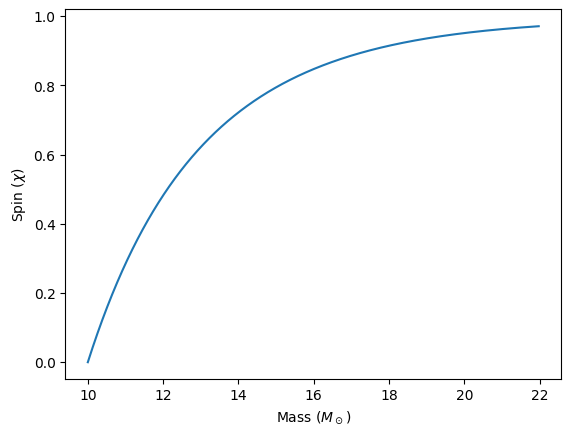

In [29]:
import matplotlib.pyplot as plt

plt.plot(disk_bh_pro_masses, disk_bh_pro_spins)
plt.xlabel("Mass ($M_\odot$)")
plt.ylabel("Spin ($\chi$)")